# Level 2 Inferential Statistics

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
def create_folder(folder_path):
    """
    Check whether the specified path exists or not
    Create a new directory if it does not exist 
    """
    isExist = os.path.exists(folder_path)
    if not isExist:
        os.makedirs(folder_path)
        
path = './results/2_inferential_statistics/'
create_folder(path)

In [3]:
df =  pd.read_csv("./results/0_data_cleaning/dataset.csv")
df = df.drop(columns= ["id"],)
df.head().T

,0,1,2,3,4
accident_severity,Serious,Slight,Slight,Slight,Slight
year,2005,2005,2005,2005,2005
month,Jan,Jan,Jan,Jan,Jan
hour,17,17,0,10,21
1st_road_class,A,B,C,A,Unclassified
carriageway_hazards,None,None,None,None,None
junction_control,Give way or uncontrolled,Auto traffic signal,Give way or uncontrolled,Give way or uncontrolled,Give way or uncontrolled
day,Tuesday,Wednesday,Thursday,Friday,Monday
junction_detail,Not at junction or within 20 metres,Crossroads,Not at junction or within 20 metres,Not at junction or within 20 metres,Not at junction or within 20 metres
light_conditions,Daylight,Darkness - lights lit,Darkness - lights lit,Daylight,Darkness - lighting unknown


### Target variable

In [4]:
y = df["accident_severity"]

# 1) Numerical variables

In [5]:
numerical_features = list(df.describe().columns)
for feature in ['year', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities']:
    numerical_features.remove(feature)

X_num = df[numerical_features]

In [6]:
X_num.head()

,hour,speed_limit,time,latitude,longitude,number_of_casualties,number_of_vehicles
0,17,30.0,1,51.489096,-0.191170,1,1
1,17,30.0,1,51.520075,-0.211708,1,1
2,0,30.0,2,51.525301,-0.206458,1,2
3,10,30.0,1,51.482442,-0.173862,1,1
4,21,30.0,2,51.495752,-0.156618,1,1


In [7]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,1882016.0,13.574621,5.148910,0.000000,10.000000,14.000000,17.000000,23.000000
speed_limit,1882016.0,38.650410,14.063341,0.000000,30.000000,30.000000,50.000000,70.000000
time,1882016.0,1.306514,0.461046,1.000000,1.000000,1.000000,2.000000,2.000000
latitude,1882016.0,52.312782,1.121110,49.912941,51.468115,52.016258,53.316524,60.586586
longitude,1882016.0,-1.243564,1.283306,-6.317477,-2.134279,-1.231088,-0.176027,1.762010
number_of_casualties,1882016.0,1.349052,0.820567,1.000000,1.000000,1.000000,1.000000,93.000000
number_of_vehicles,1882016.0,1.842087,0.714229,1.000000,1.000000,2.000000,2.000000,67.000000


## 2-Sample t-test

For every feature, we compare the mean frequency of accidents severity ("Serious" and "Slight"), we apply a 2-tail t-test for the following hypotheses:
* Null Hypothesis (H0): Serious accidents mean = Slight accidents mean;
* Alternative Hypothesis (H1): Serious accidents mean ≠ Slight accidents mean;

In [8]:
df_num = pd.concat([y, X_num], axis=1)
grp = df_num.groupby("accident_severity")
grp.mean()

,hour,speed_limit,time,latitude,longitude,number_of_casualties,number_of_vehicles
accident_severity,,,,,,,
Serious,13.581226,40.721534,1.343463,52.355102,-1.267429,1.477584,1.704721
Slight,13.573451,38.283673,1.299972,52.305288,-1.239338,1.326292,1.866410


### Two tailed 2-sample t-test 

In [9]:
y = df["accident_severity"]
df_num = pd.concat([y, X_num], axis=1)

alpha = 0.05

p_values, null_hypothesis, t_test_values = [],[],[]
serious_means, slight_means = [],[]
serious_var, slight_var = [],[]
var_ratios = []
levene_p_values = []

for feature in numerical_features:
    serious = df_num[ df_num["accident_severity"] == "Serious"][feature]
    slight = df_num[ df_num["accident_severity"] == "Slight"][feature]
    
    serious_var.append(serious.var())
    slight_var.append(slight.var())
    
    var_ratio = serious.var() / slight.var()
    
    serious_means.append(serious.mean())
    slight_means.append(slight.mean())   
    var_ratios.append(var_ratio)

    # Levene test to check variance equality between columns
    stat, levene_p_value = stats.levene(serious, slight) # H0: Variances are equal | H1: Variances are not equal

    if levene_p_value > 0.05: # Fail to reject H0
        statistic, p_value = stats.ttest_ind(serious, slight, equal_var=True)
    else:
        statistic, p_value = stats.ttest_ind(serious, slight, equal_var=False)

    if p_value < alpha /2:
        null_hypothesis.append('Reject') # H1: samples have different average 
    else:
        null_hypothesis.append('Fail to Reject') #H0: 2 independent samples have identical average (expected) values.

    levene_p_values.append(levene_p_value)
    p_values.append(p_value)
    t_test_values.append(statistic)
        
    
        
results = pd.DataFrame({
    #'Var (Serious)': serious_var,
    #'Var (Slight)': slight_var,
    'Mean (Serious)': serious_means ,
    'Mean (Slight)': slight_means,
    'Var Ratio': var_ratios,    
    'stat': t_test_values,
    'p_value': p_values,
    'Null Hypothesis': null_hypothesis
})
results = results.set_axis(numerical_features)

to_round = ['Mean (Serious)', 'Mean (Slight)', 'Var Ratio', 'stat']
results[to_round] = results[to_round].round(3)
results.to_csv(path+ "t_test_numerical_features.csv", index=True)
results



,Mean (Serious),Mean (Slight),Var Ratio,stat,p_value,Null Hypothesis
hour,13.581,13.573,1.221,0.691,4.897609e-01,Fail to Reject
speed_limit,40.722,38.284,1.122,81.833,0.000000e+00,Reject
time,1.343,1.300,1.074,45.152,0.000000e+00,Reject
latitude,52.355,52.305,1.035,21.537,8.034104e-103,Reject
longitude,-1.267,-1.239,1.000,-10.737,6.913259e-27,Reject
number_of_casualties,1.478,1.326,2.328,68.039,0.000000e+00,Reject
number_of_vehicles,1.705,1.866,1.304,-101.547,0.000000e+00,Reject


# 2) Categorical variables

In [10]:
numerical_features

['hour',
 'speed_limit',
 'time',
 'latitude',
 'longitude',
 'number_of_casualties',
 'number_of_vehicles']

In [11]:
categorical_features = list(set(df.columns) - set(numerical_features))

categorical_features.remove("accident_severity")
X_cat = df[categorical_features]
print("Shape of categorical features data:", X_cat.shape)
print("Shape of target variable data:", y.shape)
X_cat.info()

Shape of categorical features data: (1882016, 15)
Shape of target variable data: (1882016,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882016 entries, 0 to 1882015
Data columns (total 15 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   special_conditions_at_site               object 
 1   urban_or_rural_area                      object 
 2   pedestrian_crossing-physical_facilities  float64
 3   junction_detail                          object 
 4   day                                      object 
 5   weather_conditions                       object 
 6   month                                    object 
 7   year                                     int64  
 8   junction_control                         object 
 9   1st_road_class                           object 
 10  road_surface_conditions                  object 
 11  light_conditions                         object 
 12  pedestrian_crossing-human_control 

# Applying CHI Squared on categorical features to verify independence

The chi-square test of independence is a hypothesis test that focuses on assessing whether there is a meaningful relationship between two categorical variables.
 * Null Hypothesis (H0): There is no relationship between the variables
 * Alternative Hypothesis (H1): There is a relationship between variables

If the p-value is significant, the null hypothesis is automatically rejected.

## Example of a contingency table

In [12]:
contingency_example = pd.crosstab(y, [X_cat.weather_conditions])
contingency_example.to_csv(path + "/weather_contingency_table.csv")

In [13]:
alpha = 0.05

p_values, null_hypothesis, chi2_values = [],[],[]

for category in X_cat.columns:
    chi2, p_value, dof, expected =  stats.chi2_contingency(pd.crosstab(y, X_cat[category]))
    p_values.append(p_value)
    chi2_values.append(chi2)
    
    if p_value < alpha:
        null_hypothesis.append('Reject')
    else:
        null_hypothesis.append('Fail to Reject')
        
results = pd.DataFrame({
    'Feature': X_cat.columns,
    'chi2': chi2_values,
    'p_value': p_values,
    'H0: Independent': null_hypothesis,
})

results = results.set_axis(categorical_features).drop(columns=["Feature"])

to_round = ['chi2']
results[to_round] = results[to_round].round(3)
results.to_csv(path+ "independence_check_results.csv", index=True)
results

,chi2,p_value,H0: Independent
special_conditions_at_site,565.838,5.145071e-117,Reject
urban_or_rural_area,9274.535,0.000000e+00,Reject
pedestrian_crossing-physical_facilities,1132.197,1.423588e-242,Reject
junction_detail,11091.233,0.000000e+00,Reject
day,2787.808,0.000000e+00,Reject
weather_conditions,1758.880,0.000000e+00,Reject
month,428.833,4.582528e-85,Reject
year,2237.075,0.000000e+00,Reject
junction_control,2775.807,0.000000e+00,Reject
1st_road_class,1035.150,1.474123e-221,Reject


In [14]:

from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns



y = df["accident_severity"]
df_cat = pd.concat([y, X_cat], axis=1)

chi2_matrix = pd.DataFrame(data=[(0 for i in range(len(df_cat.columns))) for i in range(len(df_cat.columns))], columns=list(df_cat.columns))
chi2_matrix.set_index(pd.Index(list(df_cat.columns)), inplace = True)


# Finding p_value for all columns and putting them in the resultant matrix
for c1 in df_cat.columns:
    for c2 in df_cat.columns:
        if c1 != c2:
            chi2, p_value, dof, expected =  stats.chi2_contingency(pd.crosstab(df_cat[c1], df_cat[c2]))
            chi2_matrix.loc[c1, c2] = p_value
        else:
            chi2_matrix.loc[c1, c2] = 0

chi2_matrix.to_csv(path + "chi2_matrix.csv")

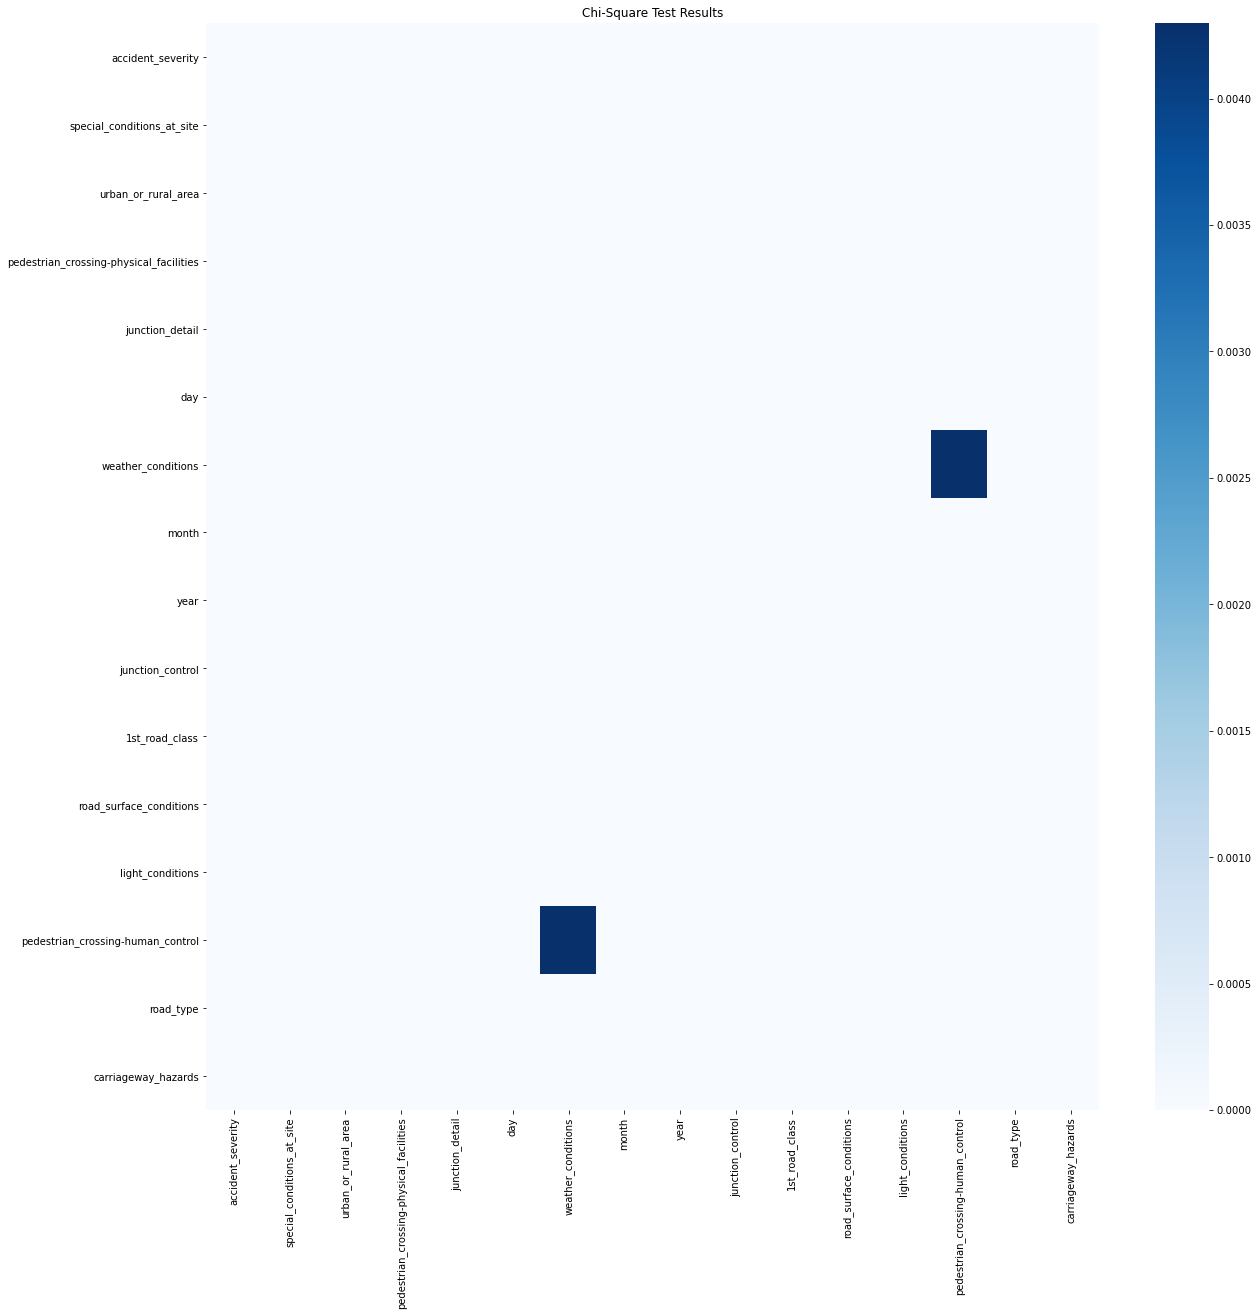

In [15]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(chi2_matrix, annot=False, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.savefig(path+"chi2_heatmap.png")
plt.show()